In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import time

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

%matplotlib inline

(210, 2) (210,)
[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Generalization Error: 0.03


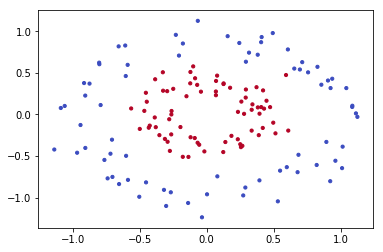

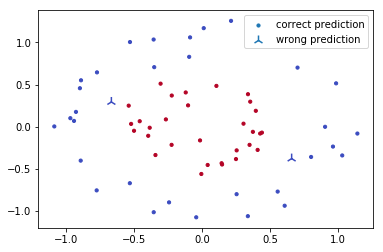

In [41]:
N = 210
cut = int(N*0.7)

data, features = make_circles(n_samples=N, shuffle=True, noise=0.12, factor=0.4)

print data.shape, features.shape

train_data, train_features = data[:cut], features[:cut]
test_data, test_features = data[cut:], features[cut:]

# plt.scatter(data[features==0][:,0], data[features==0][:,1], color='red')
# plt.scatter(data[features==1][:,0], data[features==1][:,1], color='blue')
# plt.show()

fig, ax = plt.subplots()
ax.scatter(train_data.transpose()[0], train_data.transpose()[1], marker='o', s=10, 
           c = train_features, cmap=plt.cm.coolwarm)
plt.plot()

points = tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

test = []

for i in test_data:
    distances = tf.reduce_sum(tf.square(i - train_data), reduction_indices=1)
    neighbor = tf.arg_min(distances, 0)
    test.append(train_features[sess.run(neighbor)])
print test
fig, ax = plt.subplots()

ax.scatter(test_data[test==test_features].transpose()[0], test_data[test==test_features].transpose()[1], 
           marker='o', s=10, c = np.array(test)[test==test_features], 
           cmap=plt.cm.coolwarm, label='correct prediction')

ax.scatter(test_data[test!=test_features].transpose()[0], test_data[test!=test_features].transpose()[1], 
           marker='2', s=100, c = np.array(test)[test!=test_features], 
           cmap=plt.cm.coolwarm, label='wrong prediction')
ax.legend()
plt.plot()

print "Generalization Error: %.2f" %(len(test_features[test!=test_features])*1.0/len(test_features))